Khanh Nghiem  
Last updated: 01/01/19  
Dijkstra Shortest Path algorithm  
**Input**: connected and directed graph G, start vertex s, non-negative length l_e of each edge  
**Output**: the shortest path from S to every other very other vertex  

## Dijkstra's Algorithm

- Let S be the set of explored nodes
- Initialize S = {s}
- For each vertex v in V, we will store shortest path distance d(v)
- Initialize d(s) = 0
- while S != V: # while there are still nodes left to be explored
    + Let N be the set of vertices outside S outneighboring vertices in S
    + For each v in N comput:
        - pi(v) = min d(u) + l_e (for e=(u,v) and u in S)
        - Let v' be the nearest node from N, or pi(v') = min pi(v)
        - Add v' to S, let d(v') = pi(v')

Improved Djaktra's Algorithm
- Initialize dist[s] = 0 and other distances = infinity
- Initialize heap Q = V, where key is the distance from s
- Repeatedly extract min of Q:
    - for each v out-neighbor of u:
        - if dist[v] < dist[u] + l_(u,v):
            - dist[v] = dist[u] + l_(u,v)

In [25]:
def print_graph(G):
    for n, nbrs in G.adj.items():
        for nbr, eattr in nbrs.items():
            wt = eattr['weight']
            print('(%d, %d, %.3f)' % (n, nbr, wt))

In [26]:
import networkx as nx

test_graph_1 = [(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)]

G = nx.DiGraph()
G.add_weighted_edges_from(test_graph_1)
print_graph(G)

(1, 2, 0.125)
(1, 3, 0.750)
(2, 4, 1.200)
(3, 4, 0.375)


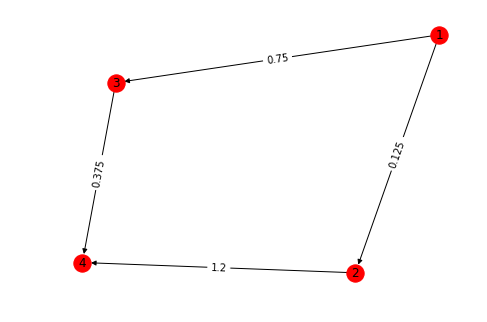

In [27]:
import matplotlib.pyplot as plt
weights = nx.get_edge_attributes(G,'weight')
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels = True)
nx.draw_networkx_edge_labels(G,pos,edge_labels=weights)
plt.draw()

[(1, {'dist': 0}), (2, {'dist': 0.125}), (3, {'dist': 0.75}), (4, {'dist': 1.125})]


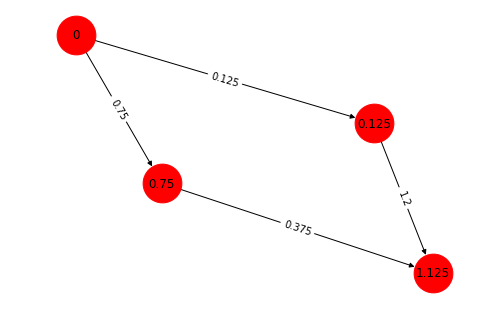

In [45]:
from sys import maxsize as infinity

# a utility function to find the unvisited node with minimum distance from source
def min_dist(G, V, visited):
    # initialize min dist = infinity and min vertex = null
    cur_min = infinity
    min_v = None
    
    # traverse the set of vertices V to find
    # the vertex with min distance from source
    for v in V:
        if G.nodes[v]['dist'] < cur_min and v not in visited:
            cur_min = G.nodes[v]['dist']
            min_v = v
    return min_v
    

# dijkstra takes in a weighted directed graph and a starting node
def dijkstra(G, s):
    # initiate distance of all nodes from source to be infinity
    V = G.nodes()
    for v in V:
        G.nodes[v]['dist'] = infinity
    
    # overwrite distance from source to source = 0
    G.nodes[s]['dist'] = 0
    
    # initiate the list of visisted nodes 
    visited = []
    
    # repeatedly choose from unvisited nodes
    for i in range(len(V)):
        # choose the node u with minimum distance from source
        u = min_dist(G, V, visited)
        out_neighbors = list(G.adj[u])
        for v in out_neighbors:
            G.nodes[v]['dist'] = min(G.nodes[v]['dist'], G.nodes[u]['dist'] + G.edges[u,v]['weight'])
        
        # add u to the set of visited nodes
        visited.append(u)

    print(G.nodes.data())

def update_graph_draw(G):
    # create the mapping for relabelling
    mapping = {}
    V = G.nodes()
    for v in V:
        mapping[v] = G.nodes[v]['dist']
    
    # H is the graph G but with nodes relabelled as distance from source
    H=nx.relabel_nodes(G,mapping)
    
    weights = nx.get_edge_attributes(H,'weight')
    pos = nx.spring_layout(H)
    
    nx.draw(H,pos,with_labels = True, node_size=1500)
    nx.draw_networkx_edge_labels(H,pos,edge_labels=weights)
    plt.draw()

dijkstra(G, list(G.nodes())[0])
update_graph_draw(G)